# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data sciences libraries to build a model capable of predicting whether or no someone has heart disease based on their medical attributes

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem definition
In a statment,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

There is also a version of it available on Kaggle - https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data

## 3. Evaluation 

> If we can 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll progressing with the project.

## Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation


In [1]:
# Import all the tools we neeed
 
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models for Sickt-Learn
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc

### Load Data

In [2]:
heart = pd.read_csv('heart.csv')
heart.shape

(1025, 14)

## 4. Features 

**Create a data dictionary**

This where you'll get different information about each of the features in your data.
* age in years
* sex (1 = male, 0 = female)
* cp: chest pain type (4 values)
* trestbps: resting blood pressure in mmHg
* chol: serum cholestoral in mg/dl
* fbs: fasting blood sugar > 120 mg/dl
* restecg: resting electrocardiographic results (values 0,1,2)
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes, 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Data Exploration (exploration with data analysis or EDA)

The goal is to find out more about the data and became a subject model export on the dataset you're working with.

1. What questions are you trying to solve?
2. What kind of data we have?
3. What's missing from the data and how you deal with it?
4. Where are the outliers and why should you about them?
5. How you can add, change or remove features to get more out of your data?
   

In [19]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [20]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [22]:
# How many of each class there
heart['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

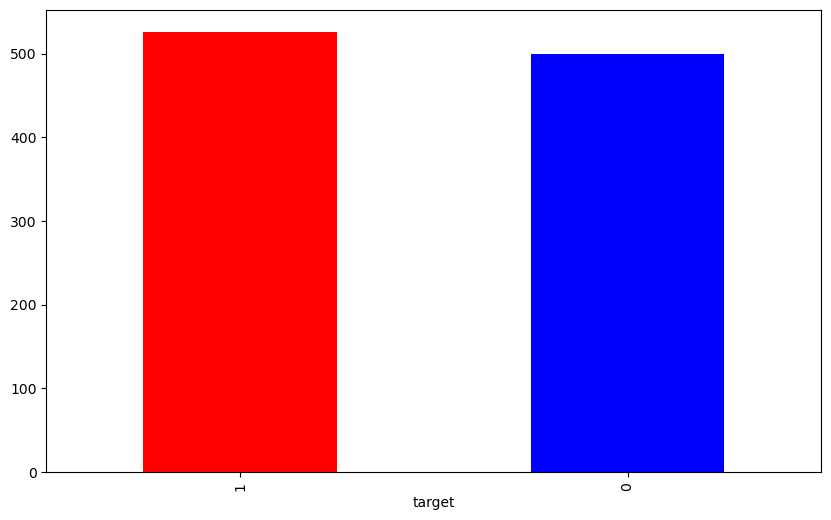

In [45]:
heart['target'].value_counts().plot(kind='bar', color=['red', 'blue'], 
                                    figsize=(10, 6));

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Are they missing values?
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart disease Frequency according to Sex

In [5]:
heart['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

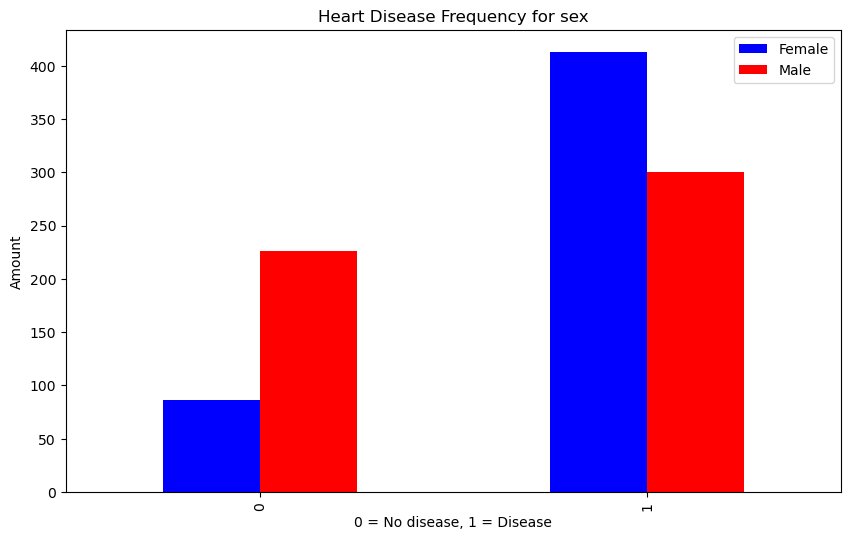

In [35]:
# Compare target collumns with target column
pd.crosstab(heart['sex'], heart['target']).plot(kind='bar', color=['blue', 'red'],
                                               figsize=(10, 6));
plt.title('Heart Disease Frequency for sex')
plt.xlabel('0 = No disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male']);

### Age vs. Max Heart Rate for Heart disease

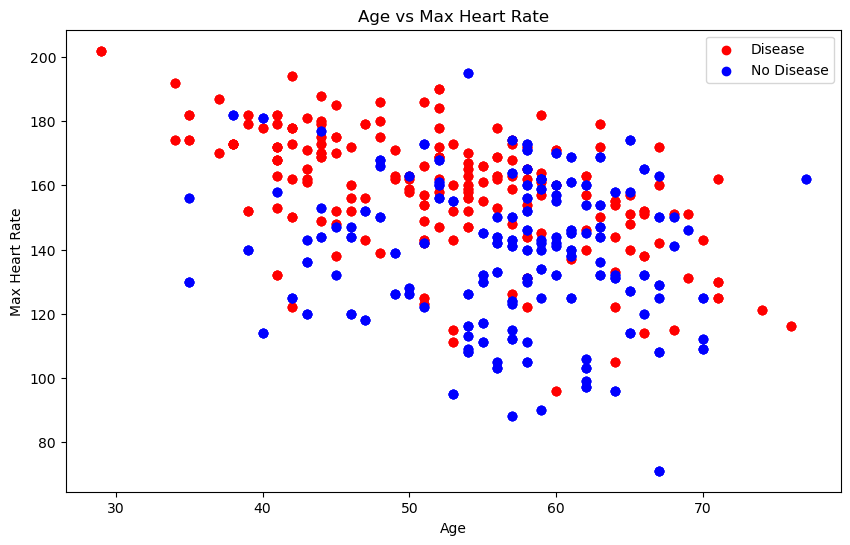

In [33]:
# create a another figure
fig, ax0 = plt.subplots(figsize=(10, 6))

# scatter with positive examples
scatter = ax0.scatter(x=heart['age'][heart['target'] == 1],
                     y=heart['thalach'][heart['target'] == 1],
                     c='red')

# scatter with negative examples
scatter = ax0.scatter(x=heart['age'][heart['target'] == 0],
                     y=heart['thalach'][heart['target'] == 0],
                     c='blue')

# Customize
ax0.set(title='Age vs Max Heart Rate',
       xlabel='Age',
       ylabel='Max Heart Rate')

ax0.legend(['Disease', 'No Disease'])

plt.show()

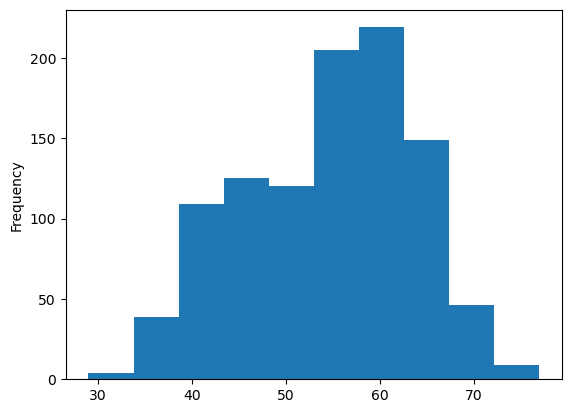

In [37]:
# check the distribution of the age column with a histogram
heart['age'].plot(kind='hist');

It's a normal distribution. Read more about `normal distribution` on  https://en.wikipedia.org/wiki/Normal_distribution

### Heart disease frequency per Chest pain type

* 0 : Typical angina
* 1 : Antypical angina
* 2 : Non-anginal pain
* 3 : Asymptomatic 

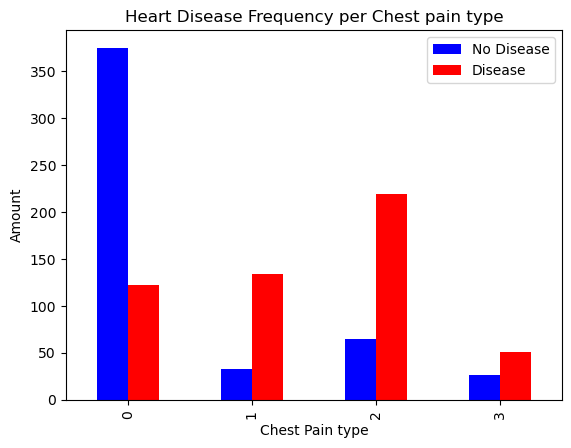

In [44]:
pd.crosstab(heart['cp'], heart['target']).plot(kind='bar', color=['blue', 'red']);
plt.title('Heart Disease Frequency per Chest pain type')
plt.xlabel('Chest Pain type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease']);

### Correlation matrix

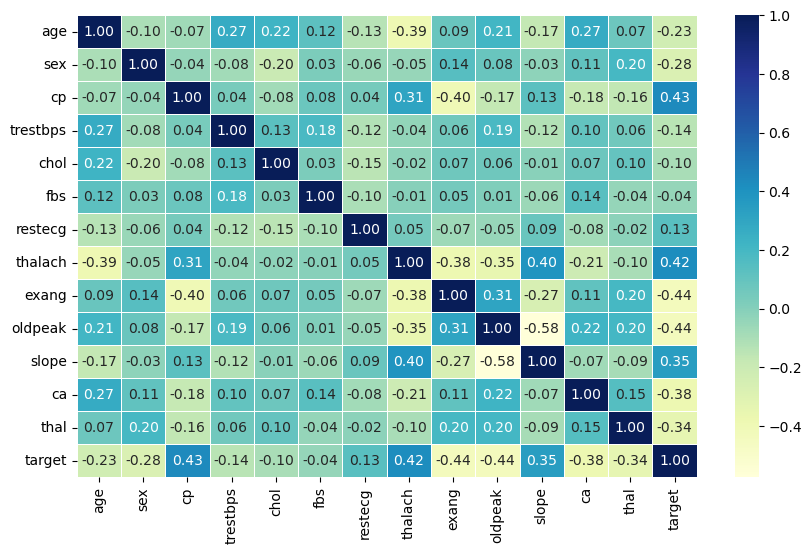

In [9]:
# Make a correlation matrix
corr_matrix = heart.corr()

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu');

* Values > 0: Indicate a positive correlation with heart disease.
* Values < 0: Indicate a relationship between two variables in wich one variable increases as the other decreases.

Read more about `correlation matrix` on https://www.displayr.com/what-is-a-correlation-matrix/

## 5. Modelling

In [4]:
np.random.seed(7)
# split the data in X and y
X = heart.drop('target', axis=1)
y = heart['target']

# Split the data in train e test division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

We can use 3 different models:
1. LinearSVC
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [78]:
# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models: dict of different Scikit-Learn machine learning models
    X_train: training data
    X_test: testing data
    y_train: training labels
    y_test: test labels

    Return the model scores
    """
    # Setup a random seed
    np.random.seed(7)
    
    # A dictionary to save the resul of machine learning models
    model_scores = {}
    
    # Loop in models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        
        # test the model
        score = model.score(X_test, y_test)
        
        print(f"{name}: {score * 100:.2f}% in", end=' ')
        # Calcule the time spend
        %timeit model.fit(X_train, y_train)
        
        # evaluate the model score
        model_scores[name] = score        
    return model_scores

In [79]:
# Puts a model in a dictionary
models = {"Linear SVC": LinearSVC(),
          "Neighbours Classifier": KNeighborsClassifier(),
          "Random Forest Classifier": RandomForestClassifier()
         }
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

Linear SVC: 83.90% in 6.59 ms ± 447 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Neighbours Classifier: 71.71% in 3.46 ms ± 411 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Random Forest Classifier: 98.54% in 187 ms ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Model Comparison

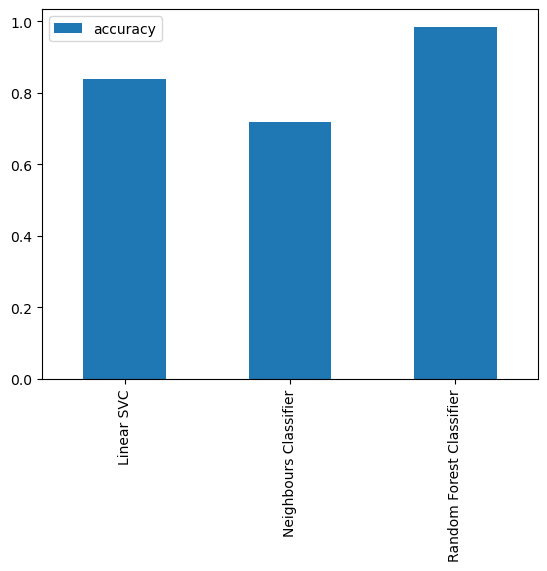

In [35]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot(kind='bar');

The Random Forest Classifier has the goal of this project `score >= 95 %` but his is slower then compare other models

So, let's go try to tuning/improving our models
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [81]:
# Tuning KNN
train_scores = []
test_scores = []

# create a list of different for n_neighbors
neighbors = range(1, 21)

# setup the KNN isntance
knn = KNeighborsClassifier()

# Loop thought different n neighbohrs
for neighbor in neighbors:
    knn.set_params(n_neighbors=neighbor)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test score list
    test_scores.append(knn.score(X_test, y_test))

Text(0.5, 1.0, 'Number of neighboors per Scores')

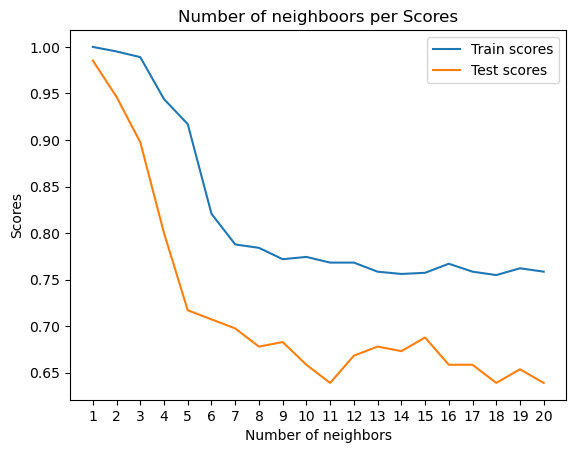

In [99]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score');

# Customize
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Scores")
plt.legend(['Train scores', 'Test scores'])
plt.title('Number of neighboors per Scores')

In [97]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print(f"Knn Score: {knn_score * 100 :.2f}% in", ' ')
%timeit knn.fit(X_test, y_test)

Knn Score: 98.54% in  
1.69 ms ± 8.86 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


We get a good model precision and is faster than the Random Forest Classifier

### Hyperparamater tuning using RandomizedSearchCV

* Linear SVC

In [5]:
# Create a hypterparamater for LinearSVC
linear_svc_grid = {
    'dual': [True, False],
    'C': np.arange(1, 10, 0.5),
    'max_iter': np.arange(100, 5000, 100),
}


Now using a Randomized Search CV

In [14]:
# tune linear SVC
np.random.seed(7)

# setup random hyperparameters search for linear SVC
rs_linear_svc = RandomizedSearchCV(LinearSVC(),
                          param_distributions=linear_svc_grid,
                          cv=5,
                          n_iter=20);

# Fit random hyperparamaters search model for LinearSVC
rs_linear_svc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearSVC(), n_iter=20,
                   param_distributions={'C': array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ,
       7.5, 8. , 8.5, 9. , 9.5]),
                                        'dual': [True, False],
                                        'max_iter': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200,
       2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300,
       3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400,
       4500, 4600, 4700, 4800, 4900])})

In [12]:
rs_linear_svc.score(X_test, y_test)

0.8682926829268293

In [125]:
rs_linear_svc.best_params_

{'max_iter': 1400, 'dual': False, 'C': 3.0}

### Evaluating our tuned machine learning model in accuracy
* ROC curve and AUC score
* Confusion Matrix
* Precison
* Recall
* F1-score

In [16]:
# Make predictions with tuned model
y_preds = rs_linear_svc.predict(X_test)

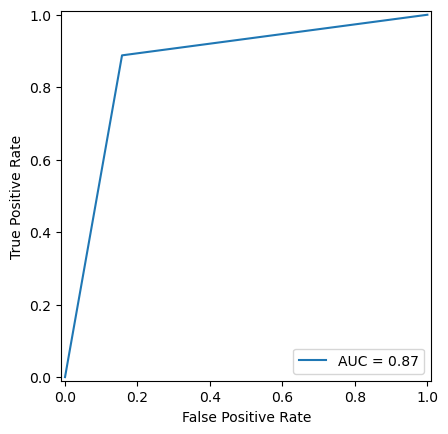

In [26]:
# Plot Roc CURVE and calculate and calculate AUC metric
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

In [28]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[ 75  14]
 [ 13 103]]


In [45]:
# function to plot a confusion matrix
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     fmt='d', # format to text in decimal fort
                     cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    

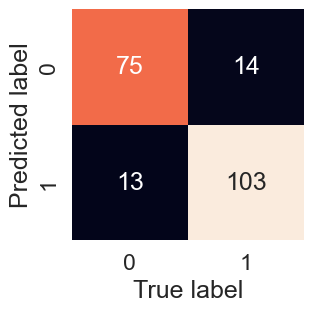

In [44]:
plot_conf_mat(y_test, y_preds)

Now we using the `cross-validation precision`, `recall` and `f1-score`

In [46]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85        89
           1       0.88      0.89      0.88       116

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



In [67]:
def evaluate_model(models, X, y):
    """
    Evaluate the model in accuracy, precision, recall and f1-score
    models = a dictionary with models
    X = data (no labels)
    y = data labels

    return a dict with scores of models
    """

    # A dictionary to save the scores
    evaluated_models = {}
    
    for name, model in models.items():
        cv_acc = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        cv_precision = cross_val_score(model, X, y, cv=5, scoring='precision')
        cv_recall = cross_val_score(model, X, y, cv=5, scoring='recall')
        cv_f1 = cross_val_score(model, X, y, cv=5, scoring='f1')

        # save the results in evaluated_models
        evaluated_models[name] = np.mean(cv_acc), np.mean(cv_precision), np.mean(cv_recall), np.mean(cv_f1)

    return evaluated_models

In [12]:
# create a dict with the best hyperparamters to each model
models = {'KneighborsClassifier': KNeighborsClassifier(n_neighbors=1),
          'RandomForestClassifier': RandomForestClassifier(),
          'LinearSVC': LinearSVC(C=4.5, dual=False, max_iter=500)}

evaluated_models = evaluate_model(models, X, y)

In [39]:
# Creating a dataframe to best visualization
data = []
names = []

for name, scores in evaluated_models.items():
    data.append({
        'Accuracy': scores[0],
        'Precision': scores[1],
        'Recall': scores[2],
        'F1': scores[3]
    })
    names.append(name)

cv_metrics = pd.DataFrame(data, index=names)
cv_metrics

,Accuracy,Precision,Recall,F1
KneighborsClassifier,0.982439,0.994286,0.971429,0.982606
RandomForestClassifier,0.997073,0.994495,1.000000,0.994311
LinearSVC,0.844878,0.814991,0.903145,0.856619


## 6. Conclusions

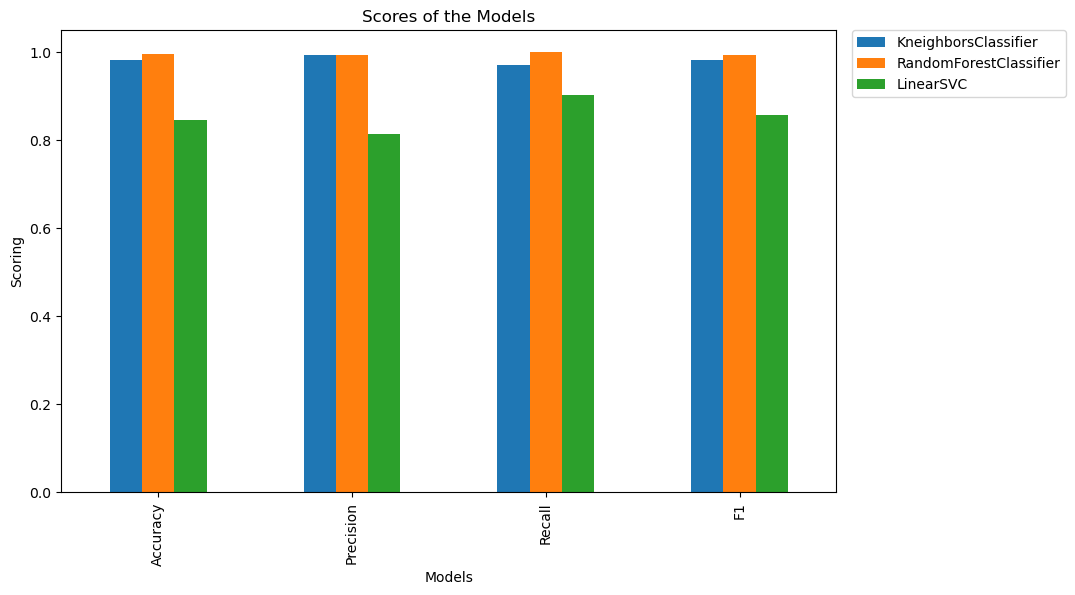

In [58]:
# Plot with the model scores
cv_metrics.T.plot(kind='bar', 
                  figsize=(10,6),
                  xlabel='Models',
                  ylabel='Scoring',
                  title='Scores of the Models')

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0);

So the model using `Random Forest Classifier` show result better than `Kneighbors Classifier`!

But, how many time each models spend to work?

In [59]:
knn = KNeighborsClassifier(n_neighbors=1)
rfc = RandomForestClassifier()

%timeit knn.fit(X_train, y_train)
%timeit rfc.fit(X_train, y_train)

3.33 ms ± 42 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
190 ms ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The Kneighbors Classifier has spend approximately int total 333 ms
The Random Forest Classifier has spend approximately in total 1900 ms

The `Kneighbors Classifier` was **5.7 times** more faster than `Random Forest Classifier`!

In [65]:
for name, scores in evaluated_models.items():
    print(f"{name} has a mean scores equals a {np.mean(scores)}")

KneighborsClassifier has a mean scores equals a 0.9826898924999479
RandomForestClassifier has a mean scores equals a 0.996469833794172
LinearSVC has a mean scores equals a 0.8549080651773349


The `KNeighborsClassifier` achieves an evaluation score approximately 0.014 lower than the `Random Forest Classifier`. 

Since the goal of the model is to achieve 95% precision, the `KNeighborsClassifier` is the best model to use because it is faster and has only a score 0.014 lower than the `Random Forest Classifier`

### Features Importances

Which features contributed most to the outcomes of the model and how they contribuite?

In [66]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [79]:
linear_svc = LinearSVC(C=4.5, dual=False, max_iter=500)
linear_svc.fit(X_train, y_train);

In [80]:
# Check coef
linear_svc.coef_

array([[-0.0029287 , -0.66593467,  0.28947802, -0.00551227, -0.0019228 ,
        -0.07152406,  0.09633329,  0.00841395, -0.37398436, -0.17146521,
         0.18153844, -0.24148557, -0.28240978]])

In [81]:
feature_dict = dict(zip(heart.columns, list(linear_svc.coef_[0])))
feature_dict

{'age': -0.002928699416452525,
 'sex': -0.6659346717535058,
 'cp': 0.28947801570000153,
 'trestbps': -0.005512267072162694,
 'chol': -0.0019228037176268092,
 'fbs': -0.07152405773411918,
 'restecg': 0.09633329257353311,
 'thalach': 0.008413952340520437,
 'exang': -0.373984361177062,
 'oldpeak': -0.17146520655389422,
 'slope': 0.18153844432636934,
 'ca': -0.2414855719730437,
 'thal': -0.2824097761375625}

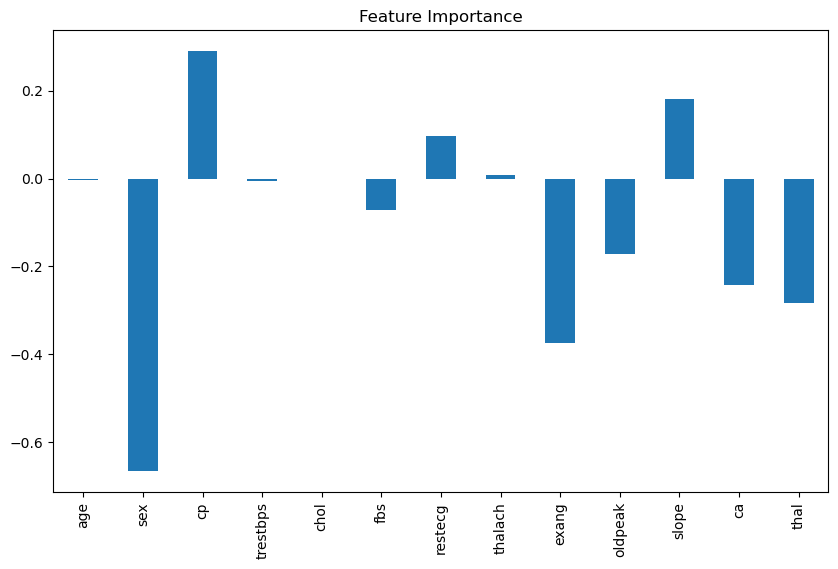

In [85]:
# Visualize features importances
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot(kind='bar', title='Feature Importance', legend=False, figsize=(10, 6));

In [96]:
# Save the model
import pickle

knn_model = KNeighborsClassifier(n_neighbors=1)
rfc_model = RandomForestClassifier()

pickle.dump(knn_model, open('k_neighbors_classifier.pkl', 'wb'))
pickle.dump(rfc_model, open('random_forest_classifier.pkl', 'wb'))